In [152]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import glob
import os

import pandas as pd
from deep_translator import GoogleTranslator #, DeeplTranslator, PonsTranslator
from langdetect import detect  

import time

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [433]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

nltk==3.7
re==2.2.1
pandas==1.4.2
numpy==1.21.5


In [143]:
#lemmatizer = WordNetLemmatizer()
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\([m|f|d|x|w]/[m|f|d|x|w]/[m|f|d|x|w]\)', '', text)
    text = re.sub(r"[()<>/]", ' ', text) # sub ()<>&/ to comma and space
    text = re.sub(r"&", 'and', text) # sub ()<>&/ to comma and space
    text = re.sub(r"[?!]", '. ', text) # sub ?! to dot and space
    text = re.sub("e\.g\.", '', text)
    text = re.sub("[\t\n\r\f\v]+", ". ", text)
    text = re.sub('\W+\.', '.', text) # remove the empty space before a dot
    text = re.sub('\W+\,', ',', text) # remove the empty space before a comma
    text = re.sub('[,\.]+\.+', '.', text) # sub multiple dots to one dot
    text = re.sub(' +',' ',text) # replace multiple whitespace by one whitespace
    
    text = [WordNetLemmatizer().lemmatize(token, "v") for token in text] #Lemmatization
    text = "".join(text)
    
    # Remove non english word
    # text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
    #      if w.lower() in words or not w.isalpha())
    text = text.strip()
    return text

In [146]:
text = ' '.join(df_full['position'].apply(clean_text))

(-0.5, 399.5, 199.5, -0.5)

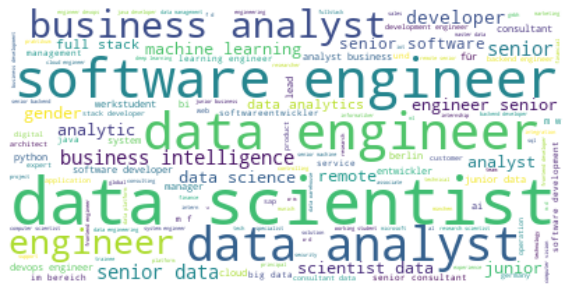

In [153]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
#plt.title("Tweets with Negative sentiment");

# Concatenate all files in folder to a single file

In [279]:
path_glassdoor = '../2907/glassdoor/'
path_indeed = '../2907/indeed/'
path_linkedin = '../2907/linkedin/'

In [296]:
df_glassdoor = pd.concat(map(pd.read_csv, glob.glob(os.path.join(path_glassdoor, "*.csv"))))
df_indeed = pd.concat(map(pd.read_csv, glob.glob(os.path.join(path_indeed, "*.csv"))))
df_linkedin = pd.concat(map(pd.read_csv, glob.glob(os.path.join(path_linkedin, "*.csv"))))

In [192]:
df_linkedin[df_linkedin['position'].str.contains('Data Analyst')].drop_duplicates(subset=['position', 'company_name'])

,position,company_name,location,job_description,link,date_post,date_retrived,type_of_job,company_detail,number_of_application
8,Data Analyst (m/w/d) for Market Intelligence,Kulzer,"Hanau am Main, Hesse, Germany","Today, Kulzer has 1500 employees at 26 locatio...",/jobs/view/3175867616/?alternateChannel=search...,4 days ago,2022-07-24,Full-time · Associate,"1,001-5,000 employees · Chemical Manufacturing",104 applicants
40,"HR Data Analyst (m/w/d), München",Roland Berger,"Munich, Bavaria, Germany",Sie suchen eine neue spannende Herausforderung...,/jobs/view/3176730889/?alternateChannel=search...,1 day ago,2022-07-24,Full-time · Associate,"1,001-5,000 employees · Business Consulting an...",5 applicants
47,Online Data Analyst,TELUS International,"Hamm, North Rhine-Westphalia, Germany",TELUS International AI-Data Solutions partners...,/jobs/view/3183297983/?alternateChannel=search...,1 day ago,2022-07-24,Contract · Entry level,"10,001+ employees · IT Services and IT Consulting",13 applicants
66,Senior Data Analyst,TUI Musement,"Hannover, Lower Saxony, Germany","Join our growing, international Accommodation ...",/jobs/view/3180195096/?alternateChannel=search...,1 day ago,2022-07-24,Full-time · Associate,"5,001-10,000 employees · Travel Arrangements",12 applicants
72,Data Analyst (m/w/d) im Lebensmitteleinzelhandel,dennree GmbH,"Töpen, Bavaria, Germany",Bio ist unsere Leidenschaft. Als Marktführer p...,/jobs/view/3178024144/?alternateChannel=search...,3 days ago,2022-07-24,Full-time · Associate,"5,001-10,000 employees · Food and Beverage Man...",16 applicants
...,...,...,...,...,...,...,...,...,...,...
493,Graduate Data Analyst,Arrow Electronics,"Neu-Isenburg, Hesse, Germany",Position:\n\nGraduate Data Analyst\n\nJob Desc...,/jobs/view/3146864037/?alternateChannel=search...,2 days ago,2022-07-24,Full-time · Entry level,"10,001+ employees · IT Services and IT Consulting",81 applicants
502,Data Analyst Marktdaten (m|w|d),MEAG,"Munich, Bavaria, Germany",Die MEAG trägt als Asset Manager von Munich Re...,/jobs/view/3119059978/?alternateChannel=search...,1 day ago,2022-07-24,Full-time · Entry level,"501-1,000 employees · Investment Management",36 applicants
286,Data Analyst Düsseldorf/München gesucht at JSA...,join.com,"Munich, Bavaria, Germany",Wir suchen Sie zur Unterstützung in einigen Pr...,/jobs/view/3181378722/?alternateChannel=search...,3 days ago,2022-07-24,Contract · Entry level,51-200 employees · Software Development,0
369,Data Analyst Marketing (m/w/d),projx GmbH,"Munich, Bavaria, Germany",This job is sourced from a job board.\n L...,/jobs/view/3184531921/?alternateChannel=search...,1 day ago,2022-07-24,Full-time · Entry level,11-50 employees · Advertising Services,2 applicants


## Delete duplicate values based on feature position, company_name, job_description

In [284]:
df_glassdoor.drop_duplicates(subset=['position', 'company_name', 'location', 'job_description'], inplace = True)

In [286]:
df_glassdoor.drop_duplicates(inplace = True)

In [285]:
df_glassdoor

,position,company_name,location,rating,job_description,link,date_post,date_retrived
0,Data Analyst (f/m/d) Sales Planning & Performance,Siemens AG,Nuremberg,4.1,Job Title: Data Analyst (f/m/d) Sales Planning...,https://glassdoor.com/partner/jobListing.htm?p...,3d,2022-07-29
1,Data Analyst (m/w/d),Rotkäppchen-Mumm Sektkellereien GmbH,Eltville am Rhein,4.0,"Rotkäppchen-Mumm ist ein erfolgreiches, intern...",https://glassdoor.com/partner/jobListing.htm?p...,11d,2022-07-29
2,Data Analyst (m/w/d),Hanseatic Unity Chartering (HU) GmbH & Co. KG,Hamburg,NaN,Whom we are looking for:SkillsProfound knowled...,https://glassdoor.com/partner/jobListing.htm?p...,22d,2022-07-29
3,"Junior Data Analyst (m, w, d)",The Data School by The Information Lab,Berlin,4.8,Das Programm der Data School von The Informati...,https://glassdoor.com/partner/jobListing.htm?p...,30d,2022-07-29
4,Data Visualization Analyst Working Student (gn),MEDWING GmbH,Berlin,4.3,We encourage and welcome ALL people to apply!D...,https://glassdoor.com/partner/jobListing.htm?p...,20d,2022-07-29
...,...,...,...,...,...,...,...,...
79,Optical Engineer / Scientist,Apple,Munich,4.4,"Summary\nPosted: Jun 21, 2022\nRole Number:200...",https://glassdoor.com/partner/jobListing.htm?p...,30d,2022-07-30
80,Data Scientist (*),DB Schenker,Essen,3.5,"At DB Schenker, you are part of a global logis...",https://glassdoor.com/partner/jobListing.htm?p...,30d,2022-07-30
81,Data Scientist (m/f/d),Bayer,Berlin,4.1,"At Bayer we’re visionaries, driven to solve th...",https://glassdoor.com/partner/jobListing.htm?p...,11d,2022-07-30
82,Data Scientist (f/m/x),Siemens Gamesa Renewable Energy,Hamburg,3.8,It takes the brightest minds to be a technolog...,https://glassdoor.com/partner/jobListing.htm?p...,14d,2022-07-30


In [287]:
df_linkedin.drop_duplicates(subset=['position', 'company_name', 'location', 'job_description'], inplace = True)

In [288]:
df_linkedin

,position,company_name,location,job_description,link,date_post,date_retrived,type_of_job,company_detail,number_of_application
0,Data Analyst Qlik Sense (d/f/m),Airbus,"Hamburg, Hamburg, Germany",Job Description\n\nAre you interested in data ...,https://www.linkedin.com/jobs/view/3195722290/...,37 minutes ago,2022-07-30,Full-time · Mid-Senior level,"10,001+ employees · Aviation and Aerospace Com...",2 applicants
1,Associate Data Analyst- Customer Experience Gr...,Agoda,"Stuttgart, Baden-Württemberg, Germany",About Agoda\n\nAgoda is an online travel booki...,https://www.linkedin.com/jobs/view/3186843680/...,3 days ago,2022-07-30,Full-time · Associate,"5,001-10,000 employees · Internet Publishing",1 applicant
2,Data Analyst / Consultant Qlikview/Qliksense (...,SThree,"Cologne, North Rhine-Westphalia, Germany",Hier geht es um DICH!\nDu bist versiert im Umg...,https://www.linkedin.com/jobs/view/3192945990/...,18 hours ago,2022-07-30,Full-time · Entry level,"1,001-5,000 employees · Staffing and Recruiting",19 applicants
3,Data Analyst,Wolt,"Berlin, Berlin, Germany",Analytics at Wolt is a business-critical compe...,https://www.linkedin.com/jobs/view/3193936938/...,1 day ago,2022-07-30,Full-time · Mid-Senior level,"5,001-10,000 employees · Internet Publishing",98 applicants
4,Data Analyst - Operations (w/m/d),MILES Mobility,"Berlin, Germany",Unsere Vision bei MILES ist: \n MAKE EVERY DRI...,https://www.linkedin.com/jobs/view/3188163963/...,4 days ago,2022-07-30,Full-time · Associate,201-500 employees · Travel Arrangements,26 applicants
...,...,...,...,...,...,...,...,...,...,...
825,Senior Machine Learning Software Engineer (f/m...,Aignostics,"Berlin, Berlin, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3185760282/...,6 days ago,2022-07-30,Full-time · Associate,11-50 employees · IT Services and IT Consulting,0
826,Informatiker / Softwareingenieur (m/w/d),Positive Thinking Company,"Berlin, Berlin, Germany",Wir sind die Positive Thinking Company. Wir su...,https://www.linkedin.com/jobs/view/3186437962/...,4 days ago,2022-07-30,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",0
827,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Munich, Bavaria, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417461/...,1 day ago,2022-07-30,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",5 applicants
828,Backend-Entwickler (m/w/d) Java,FERCHAU,"Ulm, Baden-Württemberg, Germany",Leidenschaft für technologischen Fortschritt a...,https://www.linkedin.com/jobs/view/2876103143/...,3 days ago,2022-07-30,Full-time,"5,001-10,000 employees · Human Resources Services",0


In [289]:
df_indeed.drop_duplicates(subset=['position', 'company_name', 'location', 'job_description'], inplace = True)

In [290]:
df_indeed

,position,company_name,location,rating,job_description,link,date_post,date_retrived
0,Data Analyst (m/w/d),Rotkäppchen-Mumm Sektkellereien GmbH,Homeoffice in 65343 Eltville am Rhein+1 Ort,"4,3","Rotkäppchen-Mumm ist ein erfolgreiches, intern...",https://de.indeed.com/pagead/clk?mo=r&ad=-6NYl...,PostedVor 11 Tagen geschaltet,2022-07-29
1,"Junior Data Analyst (m, w, d)",The Data School by The Information Lab,Vorübergehend im Homeoffice in Berlin+2 Orte,NaN,Das Programm der Data School von The Informati...,https://de.indeed.com/pagead/clk?mo=r&ad=-6NYl...,EmployerVor 28 Tagen aktiv,2022-07-29
2,Data Analyst,BMG Rights Management,Berlin,"3,4",\n\nFull-time\nBMG Berlin \n26 Jul 2022\n\n\nD...,https://de.indeed.com/rc/clk?jk=68f2aa8e1c6567...,PostedVor 3 Tagen geschaltet,2022-07-29
3,(Junior) Data Analyst (m/w/d),Cornelsen,Berlin+1 Ort,NaN,Für den Bereich Market Intelligence & Operatio...,https://de.indeed.com/company/Cornelsen-Verlag...,PostedVor 16 Tagen geschaltet,2022-07-29
4,Career Program - Data Analyst(m/w/d),StackFuel GmbH,10961 Berlin-Kreuzberg+1 Ort,NaN,\nJobbeschreibung\n\n Hier geht es um Folgende...,https://de.indeed.com/rc/clk?jk=37074ea2311e6b...,PostedVor 3 Tagen geschaltet,2022-07-29
...,...,...,...,...,...,...,...,...
996,Data Scientist (m/w/d),trans-o-flex Express GmbH,Weinheim,NaN,\n\n\n\n\ntrans-o-flex Express GmbH\n Weinheim...,https://de.indeed.com/rc/clk?jk=3b2d40ee2cac19...,Postedvor 30+ Tagen,2022-07-29
998,Data Scientist (f/m/d/-),SinnerSchrader,22765 Hamburg,NaN,\n\nSinnerSchrader is one of Europe's leading ...,https://de.indeed.com/rc/clk?jk=c67818857486fa...,Postedvor 30+ Tagen,2022-07-29
999,(Junior) Data Scientist (m/w/d),ABOUT YOU SE & Co. KG,Hamburg,NaN,\n Stellenbeschreibung\n Der Online-Fashionsh...,https://de.indeed.com/rc/clk?jk=f98291e44a0a4a...,Postedvor 30+ Tagen,2022-07-29
1000,"Lead Data Scientist - Supply Chain Planning, S...",Bayer,Leverkusen,"4,1","\n\nAt Bayer we’re visionaries, driven to solv...",https://de.indeed.com/rc/clk?jk=ca1bed9525f587...,Postedvor 30+ Tagen,2022-07-29


### Choose columns to concatenate 3 dataset

In [297]:
column_result = ['position', 'company_name', 'location', 'job_description', 'link']

In [298]:
df_full = pd.concat([df_glassdoor[column_result], df_indeed[column_result], df_linkedin[column_result]], ignore_index=True)

In [299]:
print('The number of job before removing duplicates is ', df_full.shape[0])

The number of job before removing duplicates is  3759


In [300]:
df_full.drop_duplicates(subset=['position', 'company_name', 'location', 'job_description'], inplace=True)

In [301]:
print('The number of job after removing duplicates is ', df_full.shape[0])

The number of job after removing duplicates is  3633


## Create language columns

In [372]:
# Translate text to english

def google_translate_to_en(text, source_language):
    text_length = 4351
    if (len(text)<text_length):
        return GoogleTranslator(source=source_language, target='en').translate(text)
    else:            
        number =  len(text) // text_length
        mod = len(text) % text_length
        lst_text = [text[i*text_length: (i + 1)*text_length] for i in range(0, number)]
        if (mod != 0):
            lst_text.append(text[-mod:])
        text_translate = ''.join(GoogleTranslator(source=source_language, target='en').translate(item) for item in lst_text)
        return text_translate # GoogleTranslator(source='de', target='en').translate(text)

# Translate text to German

def google_translate_to_de(text, source_language):
    text_length = 4351
    if (len(text)<text_length):
        return GoogleTranslator(source=source_language, target='de').translate(text)
    else:            
        number =  len(text) // text_length
        mod = len(text) % text_length
        lst_text = [text[i*text_length: (i + 1)*text_length] for i in range(0, number)]
        if (mod !=0):
            lst_text.append(text[-mod:])
        text_translate = ''.join(GoogleTranslator(source=source_language, target='de').translate(item) for item in lst_text)
        return text_translate # GoogleTranslator(source='de', target='en').translate(text)

    
def job_description_translation(df):
    df['language'] = df['job_description'].apply(detect)
    df['job_description_en'] = df.apply(lambda x: x['job_description'] if x['language']=='en' else google_translate_to_en(x['job_description'], x['language']), axis = 1)
    df['job_description_de'] = df.apply(lambda x: x['job_description'] if x['language']=='de' else google_translate_to_de(x['job_description'], x['language']), axis = 1)
    return df

In [302]:
df_full['language'] = df_full['job_description'].apply(detect)

In [309]:
df_full['position_language'] = df_full['position'].apply(detect)

In [324]:
df_full['job_description_en'] = ''
for i in range(df_full.shape[0]//500):
    if i<=(df_full.shape[0]//500):
        df_full['job_description_en'][i*500:(i+1)*500] = df_full[i*500:(i+1)*500].apply(lambda x: x['job_description'] if x['language']=='en' else google_translate_to_en(x['job_description'], x['language']), axis = 1)
    elif (df_full.shape[0] % 500 !=0):
        df_full['job_description_en'][i*500:] = df_full[i*500:].apply(lambda x: x['job_description'] if x['language']=='en' else google_translate_to_en(x['job_description'], x['language']), axis = 1)
    time.sleep(20)

TypeError: sequence item 1: expected str instance, NoneType found

In [344]:
i=6
df_full['job_description_en'][i*500:] = df_full[i*500:].apply(lambda x: x['job_description'] if x['language']=='en' else google_translate_to_en(x['job_description'], x['language']), axis = 1)

In [345]:
df_full[i*500:]

,position,company_name,location,job_description,link,language,job_description_de,job_description_en
3102,Front End Development Engineer,Amazon,"Berlin, Berlin, Germany",Description\n\nAre you passionate about buildi...,https://www.linkedin.com/jobs/view/3023604315/...,en,,Description\n\nAre you passionate about buildi...
3103,Java-Entwickler (m/w/d) im Banking-Umfeld,IBM,"Munich, Bavaria, Germany",568374BR\n\nIntroduction\n\nBist du bereit aus...,https://www.linkedin.com/jobs/view/3153602516/...,de,,568374BR\n\nIntroduction\n\nAre you ready to g...
3104,Java Developer (gn),Experis Deutschland,"Leipzig, Saxony, Germany",TOP Unternehmen sucht genau DICH!\n\nUnser Auf...,https://www.linkedin.com/jobs/view/3155377714/...,de,,TOP company is looking for YOU!\n\nOur client ...
3105,Software Engineer - Sensors and Calibration (f...,Arriver,"Unterschleißheim, Bavaria, Germany",Starting Date\n\nAs soon as possible\n\nAbout ...,https://www.linkedin.com/jobs/view/3021795388/...,en,,Starting Date\n\nAs soon as possible\n\nAbout ...
3106,Junior Application Backend Engineer - CPC Mobi...,Yelp,"Munich, Bavaria, Germany",Want to join a team where your work makes a si...,https://www.linkedin.com/jobs/view/3130222391/...,en,,Want to join a team where your work makes a si...
...,...,...,...,...,...,...,...,...
3754,Senior Machine Learning Software Engineer (f/m...,Aignostics,"Berlin, Berlin, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3185760282/...,en,,This job is sourced from a job board.\n L...
3755,Informatiker / Softwareingenieur (m/w/d),Positive Thinking Company,"Berlin, Berlin, Germany",Wir sind die Positive Thinking Company. Wir su...,https://www.linkedin.com/jobs/view/3186437962/...,de,,We are the Positive Thinking Company. We are l...
3756,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Munich, Bavaria, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417461/...,de,,We are the digitization partner in the coopera...
3757,Backend-Entwickler (m/w/d) Java,FERCHAU,"Ulm, Baden-Württemberg, Germany",Leidenschaft für technologischen Fortschritt a...,https://www.linkedin.com/jobs/view/2876103143/...,de,,Live out your passion for technological progre...


In [320]:
i=0
df_full['job_description_en'][i*500:(i+1)*500] = df_full[i*500:(i+1)*500].apply(lambda x: x['job_description'] if x['language']=='en' else google_translate_to_en(x['job_description'], x['language']), axis = 1)

,position,company_name,location,job_description,link,language,job_description_de
0,Data Analyst (f/m/d) Sales Planning & Performance,Siemens AG,Nuremberg,Job Title: Data Analyst (f/m/d) Sales Planning...,https://glassdoor.com/partner/jobListing.htm?p...,en,
1,Data Analyst (m/w/d),Rotkäppchen-Mumm Sektkellereien GmbH,Eltville am Rhein,"Rotkäppchen-Mumm ist ein erfolgreiches, intern...",https://glassdoor.com/partner/jobListing.htm?p...,de,
2,Data Analyst (m/w/d),Hanseatic Unity Chartering (HU) GmbH & Co. KG,Hamburg,Whom we are looking for:SkillsProfound knowled...,https://glassdoor.com/partner/jobListing.htm?p...,en,
3,"Junior Data Analyst (m, w, d)",The Data School by The Information Lab,Berlin,Das Programm der Data School von The Informati...,https://glassdoor.com/partner/jobListing.htm?p...,de,
4,Data Visualization Analyst Working Student (gn),MEDWING GmbH,Berlin,We encourage and welcome ALL people to apply!D...,https://glassdoor.com/partner/jobListing.htm?p...,en,
...,...,...,...,...,...,...,...
3754,Senior Machine Learning Software Engineer (f/m...,Aignostics,"Berlin, Berlin, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3185760282/...,en,
3755,Informatiker / Softwareingenieur (m/w/d),Positive Thinking Company,"Berlin, Berlin, Germany",Wir sind die Positive Thinking Company. Wir su...,https://www.linkedin.com/jobs/view/3186437962/...,de,
3756,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Munich, Bavaria, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417461/...,de,
3757,Backend-Entwickler (m/w/d) Java,FERCHAU,"Ulm, Baden-Württemberg, Germany",Leidenschaft für technologischen Fortschritt a...,https://www.linkedin.com/jobs/view/2876103143/...,de,


In [322]:
# df_full['job_description_en'] = ''
# df_full['job_description_en'][3500:] = df_full[3500:].apply(lambda x: x['job_description'] if x['language']=='en' else google_translate_to_en(x['job_description'], x['language']), axis = 1)

In [323]:
df_full

,position,company_name,location,job_description,link,language,job_description_de,job_description_en
0,Data Analyst (f/m/d) Sales Planning & Performance,Siemens AG,Nuremberg,Job Title: Data Analyst (f/m/d) Sales Planning...,https://glassdoor.com/partner/jobListing.htm?p...,en,,
1,Data Analyst (m/w/d),Rotkäppchen-Mumm Sektkellereien GmbH,Eltville am Rhein,"Rotkäppchen-Mumm ist ein erfolgreiches, intern...",https://glassdoor.com/partner/jobListing.htm?p...,de,,
2,Data Analyst (m/w/d),Hanseatic Unity Chartering (HU) GmbH & Co. KG,Hamburg,Whom we are looking for:SkillsProfound knowled...,https://glassdoor.com/partner/jobListing.htm?p...,en,,
3,"Junior Data Analyst (m, w, d)",The Data School by The Information Lab,Berlin,Das Programm der Data School von The Informati...,https://glassdoor.com/partner/jobListing.htm?p...,de,,
4,Data Visualization Analyst Working Student (gn),MEDWING GmbH,Berlin,We encourage and welcome ALL people to apply!D...,https://glassdoor.com/partner/jobListing.htm?p...,en,,
...,...,...,...,...,...,...,...,...
3754,Senior Machine Learning Software Engineer (f/m...,Aignostics,"Berlin, Berlin, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3185760282/...,en,,This job is sourced from a job board.\n L...
3755,Informatiker / Softwareingenieur (m/w/d),Positive Thinking Company,"Berlin, Berlin, Germany",Wir sind die Positive Thinking Company. Wir su...,https://www.linkedin.com/jobs/view/3186437962/...,de,,We are the Positive Thinking Company. We are l...
3756,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Munich, Bavaria, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417461/...,de,,We are the digitization partner in the coopera...
3757,Backend-Entwickler (m/w/d) Java,FERCHAU,"Ulm, Baden-Württemberg, Germany",Leidenschaft für technologischen Fortschritt a...,https://www.linkedin.com/jobs/view/2876103143/...,de,,Live out your passion for technological progre...


In [303]:
df_full.language.value_counts()

en    1817
de    1811
fr       3
pl       1
ro       1
Name: language, dtype: int64

In [314]:
df_full.drop(columns=['position_language'], inplace = True)

In [315]:
df_full.tail(10)

,position,company_name,location,job_description,link,language
3749,Principal Software Engineer - Fintech (Wallet)...,Delivery Hero,"Berlin, Berlin, Germany",We are looking for a Principal Software Engine...,https://www.linkedin.com/jobs/view/3024250764/...,en
3750,Junior Test Engineer (24 month fixed term cont...,Cummins Inc.,"Marktheidenfeld, Bavaria, Germany","Description\n\nBuilds, repairs, and prepares a...",https://www.linkedin.com/jobs/view/3194603476/...,en
3751,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Karlsruhe, Baden-Württemberg, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417455/...,de
3752,DevOps Engineer (m/w/d) im Cloud-Umfeld,FERCHAU,"Potsdam, Brandenburg, Germany",Technologien auf das nächste Level heben. Sich...,https://www.linkedin.com/jobs/view/2876084835/...,de
3753,Software Architekt (m/w/d) Automotive - 100% R...,ALTEN Germany,"Bochum, North Rhine-Westphalia, Germany",Bei ALTEN können Sie alles weiterentwickeln – ...,https://www.linkedin.com/jobs/view/3083832812/...,de
3754,Senior Machine Learning Software Engineer (f/m...,Aignostics,"Berlin, Berlin, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3185760282/...,en
3755,Informatiker / Softwareingenieur (m/w/d),Positive Thinking Company,"Berlin, Berlin, Germany",Wir sind die Positive Thinking Company. Wir su...,https://www.linkedin.com/jobs/view/3186437962/...,de
3756,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Munich, Bavaria, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417461/...,de
3757,Backend-Entwickler (m/w/d) Java,FERCHAU,"Ulm, Baden-Württemberg, Germany",Leidenschaft für technologischen Fortschritt a...,https://www.linkedin.com/jobs/view/2876103143/...,de
3758,Fullstack Developer (m/w/d),PowerUs,"Berlin, Berlin, Germany",PowerUs is the #1 career platform for skilled ...,https://www.linkedin.com/jobs/view/3188710455/...,en


In [96]:
#df_full.to_csv('data_full_translate_to_en.csv', index=False)

In [347]:
df_full['job_description_de'] = ''
for i in range(df_full.shape[0]//500):
    if i<=(df_full.shape[0]//500):
        df_full['job_description_de'][i*500:(i+1)*500] = df_full[i*500:(i+1)*500].apply(lambda x: x['job_description'] if x['language']=='de' else google_translate_to_de(x['job_description'], x['language']), axis = 1)
    elif (df_full.shape[0] % 500 !=0):
        df_full['job_description_de'][i*500:]= df_full[i*500:].apply(lambda x: x['job_description'] if x['language']=='de' else google_translate_to_de(x['job_description'], x['language']), axis = 1)
    time.sleep(20)

TypeError: sequence item 1: expected str instance, NoneType found

In [356]:
i=5
df_full['job_description_de'][i*500:(i+1)*500] = df_full[i*500:(i+1)*500].apply(lambda x: x['job_description'] if x['language']=='de' else google_translate_to_de(x['job_description'], x['language']), axis = 1)

In [368]:
df_full['job_description_de'][3000:] = df_full[3000:].apply(lambda x: x['job_description'] if x['language']=='de' else google_translate_to_de(x['job_description'], x['language']), axis = 1)

In [373]:
df_full

,position,company_name,location,job_description,link,language,job_description_de,job_description_en
0,Data Analyst (f/m/d) Sales Planning & Performance,Siemens AG,Nuremberg,Job Title: Data Analyst (f/m/d) Sales Planning...,https://glassdoor.com/partner/jobListing.htm?p...,en,Berufsbezeichnung: Data Analyst (w/m/d) Sales ...,Job Title: Data Analyst (f/m/d) Sales Planning...
1,Data Analyst (m/w/d),Rotkäppchen-Mumm Sektkellereien GmbH,Eltville am Rhein,"Rotkäppchen-Mumm ist ein erfolgreiches, intern...",https://glassdoor.com/partner/jobListing.htm?p...,de,"Rotkäppchen-Mumm ist ein erfolgreiches, intern...","Little Red Riding Hood Mumm is a successful, i..."
2,Data Analyst (m/w/d),Hanseatic Unity Chartering (HU) GmbH & Co. KG,Hamburg,Whom we are looking for:SkillsProfound knowled...,https://glassdoor.com/partner/jobListing.htm?p...,en,Wen wir suchen:FähigkeitenProfunde Kenntnisse/...,Whom we are looking for:SkillsProfound knowled...
3,"Junior Data Analyst (m, w, d)",The Data School by The Information Lab,Berlin,Das Programm der Data School von The Informati...,https://glassdoor.com/partner/jobListing.htm?p...,de,Das Programm der Data School von The Informati...,The Information Lab's Data School program incl...
4,Data Visualization Analyst Working Student (gn),MEDWING GmbH,Berlin,We encourage and welcome ALL people to apply!D...,https://glassdoor.com/partner/jobListing.htm?p...,en,"Wir ermutigen und begrüßen ALLE Menschen, sich...",We encourage and welcome ALL people to apply!D...
...,...,...,...,...,...,...,...,...
3754,Senior Machine Learning Software Engineer (f/m...,Aignostics,"Berlin, Berlin, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3185760282/...,en,Dieser Job wird von einer Jobbörse bezogen.\n ...,This job is sourced from a job board.\n L...
3755,Informatiker / Softwareingenieur (m/w/d),Positive Thinking Company,"Berlin, Berlin, Germany",Wir sind die Positive Thinking Company. Wir su...,https://www.linkedin.com/jobs/view/3186437962/...,de,Wir sind die Positive Thinking Company. Wir su...,We are the Positive Thinking Company. We are l...
3756,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Munich, Bavaria, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417461/...,de,Wir sind der Digitalisierungspartner in der ge...,We are the digitization partner in the coopera...
3757,Backend-Entwickler (m/w/d) Java,FERCHAU,"Ulm, Baden-Württemberg, Germany",Leidenschaft für technologischen Fortschritt a...,https://www.linkedin.com/jobs/view/2876103143/...,de,Leidenschaft für technologischen Fortschritt a...,Live out your passion for technological progre...


In [119]:
# df_full.to_csv('data_full_translate_to_en_de.csv', index=False)

In [155]:
df_full['position_clean'] = df_full['position'].apply(clean_text)

In [167]:
df_data_scientist = df_full[(df_full['position_clean'].str.contains('data'))&(df_full['position_clean'].str.contains('science')|df_full['position_clean'].str.contains('scientist'))]

In [166]:
df_data_analyst = df_full[(df_full['position_clean'].str.contains('data')|df_full['position_clean'].str.contains('business'))&(df_full['position_clean'].str.contains('analyst'))]

In [165]:
df_data_engineer = df_full[(df_full['position_clean'].str.contains('data'))&(df_full['position_clean'].str.contains('engineer'))]

In [174]:
df_data_scientist.language.value_counts()

de    387
en    283
Name: language, dtype: int64

In [175]:
df_data_analyst.language.value_counts()

de    421
en    185
fr      1
Name: language, dtype: int64

In [176]:
df_data_engineer.language.value_counts()

en    286
de    248
Name: language, dtype: int64

# World cloud for each job title

In [168]:
text_data_scientist = ' '.join(df_data_scientist['job_description_en'].apply(clean_text))

(-0.5, 399.5, 199.5, -0.5)

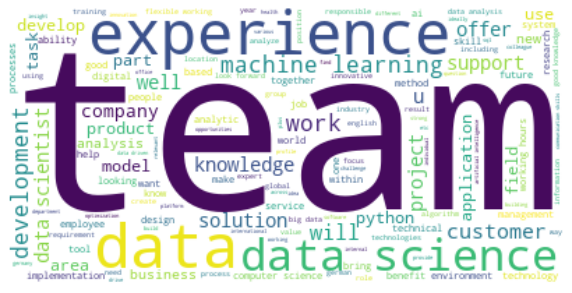

In [169]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text_data_scientist) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
#plt.title("Tweets with Negative sentiment");

In [170]:
text_data_analyst = ' '.join(df_data_analyst['job_description_en'].apply(clean_text))

(-0.5, 399.5, 199.5, -0.5)

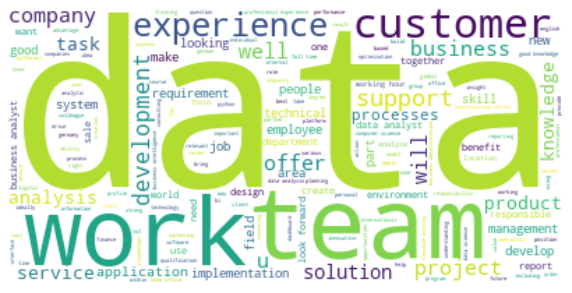

In [171]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text_data_analyst) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [172]:
text_data_engineer = ' '.join(df_data_engineer['job_description_en'].apply(clean_text))

(-0.5, 399.5, 199.5, -0.5)

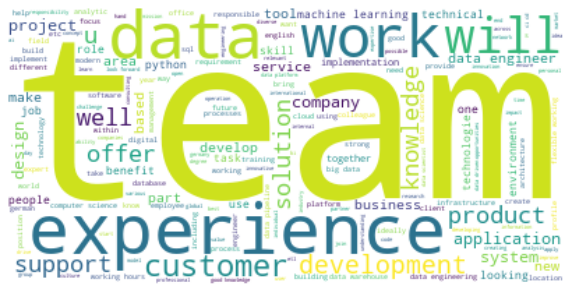

In [173]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text_data_engineer) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

# Explore position not in data field

In [182]:
df_full[df_full['position_clean'].str.contains('deep learning')==True]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
372,UX-Engineer Deep Learning Tool (m/w/d),MVTec Software GmbH,Munich,Ihr Herz schlägt für Software?\nDie MVTec Soft...,https://glassdoor.com/partner/jobListing.htm?p...,de,Your heart beats for software?\nMVTec Software...,Ihr Herz schlägt für Software?\nDie MVTec Soft...,ux-engineer deep learning tool
373,Deep Learning Engineer (m/w/d),Virtual Retail GmbH,Siegen,"Wir, Virtual Retail GmbH, sind ein Anbieter vo...",https://glassdoor.com/partner/jobListing.htm?p...,de,"We, Virtual Retail GmbH, are a provider of art...","Wir, Virtual Retail GmbH, sind ein Anbieter vo...",deep learning engineer
375,Deep Learning Engineer - Munich Vision Lab (m/...,Apple,Munich,"Summary\nPosted: Jun 10, 2022\nRole Number:200...",https://glassdoor.com/partner/jobListing.htm?p...,en,"Summary\nPosted: Jun 10, 2022\nRole Number:200...",Zusammenfassung\nGepostet: 10. Juni 2022\nRoll...,deep learning engineer - munich vision lab
376,Softwareentwickler - Bildverarbeitung / Deep L...,Workwise GmbH,Bamberg,Was erwartet Sie?\nSie entwickeln firmeneigene...,https://glassdoor.com/partner/jobListing.htm?p...,de,What to expect\nYou will continue to develop i...,Was erwartet Sie?\nSie entwickeln firmeneigene...,softwareentwickler - bildverarbeitung deep lea...
377,Senior Deep Learning Engineer for Machine Lear...,Workwise GmbH,Berlin,"Your responsibilities:\nYou develop, build and...",https://glassdoor.com/partner/jobListing.htm?p...,en,"Your responsibilities:\nYou develop, build and...","Deine Verantwortungen:\nSie entwickeln, bauen ...",senior deep learning engineer for machine lear...
382,Senior Deep Learning Engineer for Machine Lear...,Campusjäger by Workwise,Berlin,"Your responsibilities:\nYou develop, build and...",https://glassdoor.com/partner/jobListing.htm?p...,en,"Your responsibilities:\nYou develop, build and...","Deine Verantwortungen:\nSie entwickeln, bauen ...",senior deep learning engineer for machine lear...
383,Senior Deep Learning Engineer for Machine Lear...,Smart Steel Technologies GmbH,Berlin,About Smart Steel Technologies GmbH:\n\nWe are...,https://glassdoor.com/partner/jobListing.htm?p...,en,About Smart Steel Technologies GmbH:\n\nWe are...,Über Smart Steel Technologies GmbH:\n\nWir geh...,senior deep learning engineer for machine lear...
391,Praktikantin / Praktikant (w/m/d) im Bereich D...,Volkswagen AG,Wolfsburg,Ihr Arbeitsumfeld\nDie Wahrnehmung des Umfelde...,https://glassdoor.com/partner/jobListing.htm?p...,de,your working environment\nPerceiving the envir...,Ihr Arbeitsumfeld\nDie Wahrnehmung des Umfelde...,praktikantin praktikant im bereich deep learni...
393,Deep Learning Engineer (f/m/d) - Berlin,Jina AI,Berlin,"Who we are?\nFounded in Feb. 2020, raised $38M...",https://glassdoor.com/partner/jobListing.htm?p...,en,"Who we are?\nFounded in Feb. 2020, raised $38M...","Wer wir sind?\nGegründet im Februar 2020, bish...",deep learning engineer - berlin
395,Masterand:in Deep Learning / Computer Vision (...,codecentric AG,Bielefeld,Als Expert: innen für individuelle Software-En...,https://glassdoor.com/partner/jobListing.htm?p...,de,As an expert: inside for individual software d...,Als Expert: innen für individuelle Software-En...,masterand:in deep learning computer vision


# Clean link to the job

In [381]:
df_full = pd.read_csv('data_full_translate_to_en_de_2307.csv')

In [383]:
df_full.loc[df_full.link.str.count('https://de.indeed.com')==2, 'link'] = df_full.loc[df_full.link.str.count('https://de.indeed.com')==2, 'link'].str.replace('https://de.indeed.com', '',1)

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_4684\2042810705.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_full.loc[df_full.link.str.count('https://de.indeed.com')==2, 'link'] = df_full.loc[df_full.link.str.count('https://de.indeed.com')==2, 'link'].str.replace('https://de.indeed.com', '',1)


In [384]:
df_full[df_full.link.str.count('https://de.indeed.com')==2]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de


In [385]:
df_full.loc[df_full.link.str.count('https')==0, 'link'] = 'https://www.linkedin.com'+df_full.loc[df_full.link.str.count('https')==0, 'link']

In [386]:
df_full

,position,company_name,location,job_description,link,language,job_description_en,job_description_de
0,Business Intelligence Analyst (m/w/d) in Necka...,LIDL Stiftung & Co. KG,Germany,"Eine gute Idee war der Ursprung, ein erfolgrei...",https://glassdoor.com/partner/jobListing.htm?p...,de,"A good idea was the origin, a successful conce...","Eine gute Idee war der Ursprung, ein erfolgrei..."
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,GRAVIS\nEin Unternehmen der freenet Group\nAls...
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",Empowering movement at ArjoBei Arjo wissen wir...
3,(Junior) Business Intelligence Analyst (m/w/d),Quentic,Berlin,Passionate people for sustainable software\n\n...,https://glassdoor.com/partner/jobListing.htm?p...,de,Passionate people for sustainable software\n\n...,Passionate people for sustainable software\n\n...
4,Business Analyst (m/f/d) - Shipment Routing En...,Hapag Lloyd AG,Hamburg,What is the fastest way to route a shipment of...,https://glassdoor.com/partner/jobListing.htm?p...,en,What is the fastest way to route a shipment of...,"Was ist der schnellste Weg, um eine Lieferung ..."
...,...,...,...,...,...,...,...,...
4544,Lead Software Architect (m/f/x),Oerlikon,"Feldkirchen, Bavaria, Germany",Your responsibilities will be\nHelp develop an...,https://www.linkedin.com/jobs/view/3009902621/...,en,Your responsibilities will be\nHelp develop an...,Ihre Aufgaben werden sein\nHelfen Sie bei der ...
4545,Senior UX Designer/ Researcher (m/w/d),Tom Tailor,Germany,Let yourself be inspired by the spirit of a co...,https://www.linkedin.com/jobs/view/3169744763/...,en,Let yourself be inspired by the spirit of a co...,Lassen Sie sich begeistern vom Spirit eines Un...
4546,Back End Developer,TechAi,European Union,"My client is a disruptive, Web3 startup with a...",https://www.linkedin.com/jobs/view/3176144110/...,en,"My client is a disruptive, Web3 startup with a...",Mein Kunde ist ein disruptives Web3-Startup mi...
4547,Frontend - Web Entwicklung (m/w/d),XELANED GmbH,"Hallbergmoos, Bavaria, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3184538305/...,de,This job is sourced from a job board.\n l...,This job is sourced from a job board.\n L...


In [387]:
df_full.to_csv('data_full_translate_to_en_de_2307.csv', index=False)

In [231]:
df_full.iloc[510,:].link

'https://de.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0B9jmS8_DawvnSszR1R9r_l6bAMJN29IHEa9TKkawvQIA19jyzoh93YmVGfdqV_318h7CJenzxGkCVhLED_qUMTTE_VOVEha_RNW1m79vULPtDl39C2vXxvO8zm-2PzMG-5mVBaHmt5D_YueD2RGIQmWW05oKmHbPZORokh3le-yNGhdfbWOtqEtKcGHuqVWmTgaaeHysTvHpq1Kx_2m_CZE5xC-pgoAOaukLut9Y0lBat-PIMx5SHjJnF18IN9PsYOiqPi26cfa9EPmcsW9DjxKEo4O03Ti8voUcNKpnbLqoHtRHbr_odsyxAbW41UDBHnI8qeEeKh-0yduDqdPX3icWfGI2VMuUgl6whrNtoga6kVQ1l4MAX8biMBkwk4FaUXnTkM7CXLPFQpzuyzOQWR4iNef4cXUWvkN_tkxJo-be0R-5fY12xonkn0U413BqlT4ltDo_28sH15Z_5F64xBc3rj3OV5tOWjQ_eVcjXA4Sa3ZziWIvTiPnC-v0aofnwv4rmJlcFHujaRpzws8YGY_9OtvlNc97rpO_yXdd2L73F01h8aPMGNVW1u1e9i0pOJf8TzW7In7g==&xkcb=SoAr-_M3bQ-6wp_Tbh0KbzkdCdPP&p=3&fvj=0&vjs=3&tk=1g8grd8k8t3d9801&jsa=3544&oc=1&sal=0'

# Explore data job

In [239]:
df_full[df_full.position_clean.str.contains('business analyst')]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,,controller business analyst
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",,business analyst mit schwerpunkt commercial ex...
4,Business Analyst (m/f/d) - Shipment Routing En...,Hapag Lloyd AG,Hamburg,What is the fastest way to route a shipment of...,https://glassdoor.com/partner/jobListing.htm?p...,en,What is the fastest way to route a shipment of...,,business analyst - shipment routing engine - l...
6,Business Analyst (m/w/d) Instandhaltung,Heidrun Jürgens Personaldienstleistungen,Hamburg,15. Juli 2022\nDatum:\n15. Juli 2022\nStartter...,https://glassdoor.com/partner/jobListing.htm?p...,de,"July 15, 2022\nDate:\nJuly 15, 2022\nStart dat...",,business analyst instandhaltung
10,Business Analyst (m/w/d) Digital Solutions,Mazars GmbH & Co. KG,Berlin,Das erwartet Dich\nDu nimmst aktiv Teil an Inn...,https://glassdoor.com/partner/jobListing.htm?p...,de,That awaits you\nYou take an active part in in...,,business analyst digital solutions
...,...,...,...,...,...,...,...,...,...
3008,Procurement Controller/ Business Analyst Procu...,Ottobock,"Berlin, Germany",Summary StatementOur mission at Ottobock is si...,https://www.linkedin.com/jobs/view/3175858064/...,en,Summary StatementOur mission at Ottobock is si...,,procurement controller business analyst procur...
3403,SAP Junior Berater / Business Analyst Master D...,Deloitte,"Berlin, Berlin, Germany",Du machst den Unterschied. Ob im Business Audi...,https://www.linkedin.com/jobs/view/2839217282/...,de,you make the difference Whether in Business Au...,,sap junior berater business analyst master dat...
3470,Senior IT Business Analyst CRM & Customer Data...,Abbott,"Wiesbaden, Hesse, Germany",Abbott is a global healthcare leader that help...,https://www.linkedin.com/jobs/view/3179860532/...,en,Abbott is a global healthcare leader that help...,,senior it business analyst crm and customer da...
3813,Data & Business Analyst E-Commerce (m/w/d),buah GmbH,"Berlin, Berlin, Germany",An alle Daten-Junkies in Deutschland: Du kanns...,https://www.linkedin.com/jobs/view/3181360946/...,de,To all data junkies in Germany: Can't get enou...,,data and business analyst e-commerce


In [238]:
list(df_full.position_clean)

['business intelligence analyst in neckarsulm',
 'controller business analyst',
 'business analyst mit schwerpunkt commercial excellence',
 'junior business intelligence analyst',
 'business analyst - shipment routing engine - limited to a period of 18 months',
 'senior analyst digital business development',
 'business analyst instandhaltung',
 'data analyst*in, client strategy and insights - am standort irland',
 'operations performance analyst manager',
 'data analyst remote',
 'business analyst digital solutions',
 'web analyst remote',
 'senior business analyst bi',
 'operations process analyst manager',
 'customer targeting and test analyst, region ceu',
 'pricing analyst',
 'business analyst',
 'europe and africa customers procurement analyst',
 'interim business analyst 100% remote',
 'edge cloud engineer analyst all genders',
 'internship customer experience analyst - business development remote',
 'senior web analyst - j1493796',
 'digital business analyst',
 'data visualizati

In [240]:
text = ' '.join(df_full['position_clean'].apply(clean_text))

(-0.5, 399.5, 199.5, -0.5)

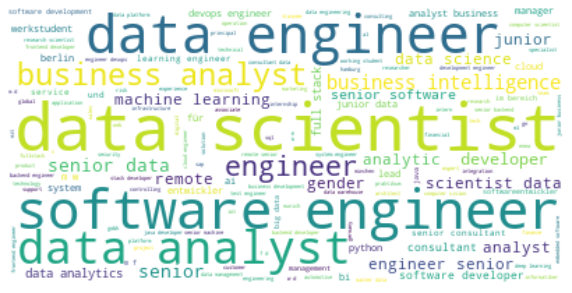

In [242]:
text = ' '.join(df_full['position_clean'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

# Explore location

In [243]:
df_full[df_full.location.str.contains('Berlin')]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,,controller business analyst
3,(Junior) Business Intelligence Analyst (m/w/d),Quentic,Berlin,Passionate people for sustainable software\n\n...,https://glassdoor.com/partner/jobListing.htm?p...,de,Passionate people for sustainable software\n\n...,,junior business intelligence analyst
5,Senior Analyst (f/m/d) Digital Business Develo...,BMG RIGHTS MANAGEMENT GmbH - Corporate,Berlin,We are looking for a Senior Analyst (f/m/d) Di...,https://glassdoor.com/partner/jobListing.htm?p...,en,We are looking for a Senior Analyst (f/m/d) Di...,,senior analyst digital business development
7,"Data Analyst*in (m/w/d), Client Strategy & Ins...",Indeed,Berlin,Your Job\nDas Client Strategy and Insights (CS...,https://glassdoor.com/partner/jobListing.htm?p...,de,your job\nThe Client Strategy and Insights (CS...,,"data analyst*in, client strategy and insights ..."
8,Operations Performance Analyst / Manager (m/f/d),Flink,Berlin,Company Description\nWe are Flink - your onlin...,https://glassdoor.com/partner/jobListing.htm?p...,en,Company Description\nWe are Flink - your onlin...,,operations performance analyst manager
...,...,...,...,...,...,...,...,...,...
4456,Software Engineer,ZEDEDA,"Berlin, Germany","ZEDEDA, the leader in IoT edge orchestration, ...",https://www.linkedin.com/jobs/view/3186327072/...,en,"ZEDEDA, the leader in IoT edge orchestration, ...",,software engineer
4477,DevOps Engineer (m/f/d),EQS Group,Berlin Metropolitan Area,JOIN OUR TEAM!\nBusiness Keeper GmbH (member o...,https://www.linkedin.com/jobs/view/3178069550/...,en,JOIN OUR TEAM!\nBusiness Keeper GmbH (member o...,,devops engineer
4490,Back End Developer,NonStop Consulting,Berlin Metropolitan Area,Back-end developer \nWould you like to be part...,https://www.linkedin.com/jobs/view/3176719189/...,en,Back-end developer \nWould you like to be part...,,back end developer
4517,Senior Data Engineer (m/f/x),Getsafe,"Berlin, Germany","Location: Onsite in Berlin, Heidelberg or Lond...",https://www.linkedin.com/jobs/view/3179787935/...,en,"Location: Onsite in Berlin, Heidelberg or Lond...",,senior data engineer


In [255]:
df_full[df_full.location.str.contains('Frankfurt am Main')]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
16,Business Analyst,KfW IPEX-Bank GmbH,Frankfurt am Main,Willkommen bei der KfW IPEX-Bank - Als Unterne...,https://glassdoor.com/partner/jobListing.htm?p...,de,Welcome to KfW IPEX-Bank - As a company of the...,,business analyst
38,Business Analyst (Junior - Senior) - m/f/d,FedEx Express EU,Frankfurt am Main,"Position Summary:\nRecommend, lead and execute...",https://glassdoor.com/partner/jobListing.htm?p...,en,"Position Summary:\nRecommend, lead and execute...",,business analyst junior - senior - m f d
59,Business Analyst (w/m/d),Deutsche Bahn,Frankfurt am Main,"Wie sich Mobilität morgen auf Schienen, Straße...",https://glassdoor.com/partner/jobListing.htm?p...,de,"How mobility will feel tomorrow on rails, road...",,business analyst
61,Senior Business Analyst Bordservice (w/m/d),Deutsche Bahn,Frankfurt am Main,"Wenn es darum geht, zukünftig Millionen Fahrgä...",https://glassdoor.com/partner/jobListing.htm?p...,de,When it comes to moving millions of passengers...,,senior business analyst bordservice
77,Business Analyst (w/m/d),TMS Trademarketing Service GmbH,Frankfurt am Main,Frankfurt am Main | Vollzeit | Berufserfahren\...,https://glassdoor.com/partner/jobListing.htm?p...,de,Frankfurt am Main | full time | professional e...,,business analyst
...,...,...,...,...,...,...,...,...,...
4393,Chief Supply Chain Data Scientist (w/m/d),Deutsche Bahn,"Frankfurt am Main, Hesse, Germany",Die Deutsche Bahn ist nicht nur einer der wich...,https://www.linkedin.com/jobs/view/3149796338/...,de,Deutsche Bahn is not only one of the most impo...,,chief supply chain data scientist
4412,Deutsche Bahn AG: Data Engineer (w/m/d),HeyJobs,"Frankfurt am Main, Hesse, Germany","Wenn es darum geht, zukünftig Millionen Fahrgä...",https://www.linkedin.com/jobs/view/3181565562/...,de,When it comes to moving millions of passengers...,,deutsche bahn ag: data engineer
4523,Data Engineer (m/w/d),Jobs via eFinancialCareers,"Frankfurt am Main, Hesse, Germany",Technik ist deine Passion und du interessierst...,https://www.linkedin.com/jobs/view/3183533475/...,de,Technology is your passion and you are interes...,,data engineer
4550,Data Analyst (m/w/d),dfv Mediengruppe,"Frankfurt am Main, Hesse, Germany",#QualitätsmacherMenschen in ihrem Business erf...,https://www.linkedin.com/jobs/view/3137336424/...,de,#Quality maker Making people more successful i...,,data analyst


In [257]:
df_full[df_full.location.str.contains('Karlsruhe')].shape[0]

57

In [251]:
df_full[df_full.location.str.contains('München')|df_full.location.str.contains('Munich')]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
45,Business Analyst (m/w/d),Consors Finanz BNP Paribas,Munich,#loveyourjob #berlin #münchen\n\nDeine Aufgabe...,https://glassdoor.com/partner/jobListing.htm?p...,de,#loveyourjob #berlin #munich\n\nYour tasks\n\n...,,business analyst
46,Business Process Analyst (m/w/d),Amadeus FiRe,Munich,Business Process Analyst (m/w/d)\nReferenz 13-...,https://glassdoor.com/partner/jobListing.htm?p...,de,Business Process Analyst (m/f/d)\nReference 13...,,business process analyst
52,Senior Business Analyst for CDP (m/f/d),Essity,Munich,Senior Business Analyst for CDP (m/f/d)\nEssit...,https://glassdoor.com/partner/jobListing.htm?p...,en,Senior Business Analyst for CDP (m/f/d)\nEssit...,,senior business analyst for cdp
68,Business Intelligence Developer(m/w/d),Michael Page,Munich,*Marktführer im Bereich Finanzen |*Sie überneh...,https://glassdoor.com/partner/jobListing.htm?p...,de,*Market leader in the field of finance |*You w...,,business intelligence developer
76,Controller / Business Analyst bei einem führen...,Poolia,Munich,Controller / Business Analyst bei einem führen...,https://glassdoor.com/partner/jobListing.htm?p...,de,Controller / Business Analyst at a leading mob...,,controller business analyst bei einem führende...
...,...,...,...,...,...,...,...,...,...
5221,(Senior) Software Engineer - Software-defined ...,CARIAD,"Munich, Bavaria, Germany","We are CARIAD, an automotive software company ...",https://www.linkedin.com/jobs/view/3147910979/...,en,"We are CARIAD, an automotive software company ...",,senior software engineer - software-defined au...
5223,Softwareentwickler und -Supporter (m/w/d),CIMPA PLM Services,"Munich, Bavaria, Germany",Das erwartet dich\nAls Mitarbeiter*in unseres ...,https://www.linkedin.com/jobs/view/3048206680/...,de,That awaits you\nAs an employee of our consult...,,softwareentwickler und -supporter
5224,Cloud Engineer (m/w/d),robominds GmbH,"Munich, Bavaria, Germany",Darauf kannst du dich freuen:\n\nAls Teil von ...,https://www.linkedin.com/jobs/view/3181351452/...,de,You can look forward to:\n\nAs part of robomin...,,cloud engineer
5225,(Senior) Web-Entwickler (m/w/d) at Abalon GmbH,join.com,"Munich, Bavaria, Germany",Wollen Sie in einem spannendem Arbeitsumfeld t...,https://www.linkedin.com/jobs/view/3181360722/...,de,Do you want to work in an exciting work enviro...,,senior web-entwickler at abalon gmbh


In [254]:
df_full[df_full.location.str.contains('Heimarbeit')|df_full.location.str.contains('Homeoffice')]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",,business analyst mit schwerpunkt commercial ex...
106,Business Intelligence Manager - Vollzeit (m/w/d),RG Finance GmbH,Heimarbeit,Die RG Finance GmbH ist externer CFO (Chief Fi...,https://glassdoor.com/partner/jobListing.htm?p...,de,RG Finance GmbH is an external CFO (Chief Fina...,,business intelligence manager - vollzeit
111,Data Analyst (m/w/d) | Business Intelligence,powwow,Heimarbeit,powwow ist ein führendes Unternehmen im deutsc...,https://glassdoor.com/partner/jobListing.htm?p...,de,powwow is a leading company in the German tele...,,data analyst | business intelligence
118,Business Intelligence (BI) Engineer (f/m/d),LeanIX GmbH,Heimarbeit,based in Germany or remote based anywhere in E...,https://glassdoor.com/partner/jobListing.htm?p...,en,based in Germany or remote based anywhere in E...,,business intelligence bi engineer
151,Für Freelancer: Big Data Analyst / Data Scient...,freelance.de,Heimarbeit,Freelancer Projekt -\nFür unser Team bei unser...,https://glassdoor.com/partner/jobListing.htm?p...,de,Freelance project -\nWe are looking for backup...,,für freelancer: big data analyst data scientis...
...,...,...,...,...,...,...,...,...,...
2773,CONSULTANT ANALYTICS & FRONTEND DEVELOPMENT (M...,REPLY,Zum Teil im Homeoffice in Deutschland,\n\nDEUTSCHLANDWEIT\n\n\nAufgaben \n\n\n We...,https://de.indeed.com/rc/clk?jk=5e75738a0c0a2f...,de,THROUGHOUT GERMANY\n\n\ntasks\n\n\n Become ...,,consultant analytics and frontend development
2791,"Datacenter Operations Engineer (f/m/d) - GER, ...",DeepL SE,Homeoffice,\nis Germany's best-known AI company. We devel...,https://de.indeed.com/rc/clk?jk=34feb709214909...,en,\nis Germany's best-known AI company. We devel...,,"datacenter operations engineer - ger, nl, uk o..."
2797,Data Warehouse Architect / Data Engineer (20h)...,krisenchat,Homeoffice,"\*\*krisenchat ist ein bundesweites, kostenlos...",https://de.indeed.com/rc/clk?jk=856aeed1c184d6...,de,"\*\* crisis chat is a nationwide, free service...",,data warehouse architect data engineer 20h
2798,Werkstudent o. Trainee Data Science (m/w/d),Cream Colored Ponies,Zum Teil im Homeoffice in 20095 Hamburg,Brandneu. Frisch gegründet. Mitten auf St. Pau...,https://de.indeed.com/rc/clk?jk=23b1baed9ebb7a...,de,Brand new. Freshly founded. In the middle of S...,,werkstudent o. trainee data science


In [249]:
list(df_full.location.unique())

['Germany',
 'Berlin',
 'Heimarbeit',
 'Hamburg',
 'Bochum',
 'Frankfurt am Main',
 'Aachen',
 'Kronberg im Taunus',
 'Bremen',
 'Eschborn',
 'Essen',
 'Feldkirchen',
 'Nuremberg',
 'Freiburg im Breisgau',
 'Mannheim',
 'Koln',
 'Munich',
 'Leonberg',
 'Stephanskirchen',
 'Darmstadt',
 'North Rhine-Westphalia',
 'Karlsruhe',
 'Hannover',
 'Überlingen',
 'Wiesbaden',
 'Düsseldorf',
 'Braunschweig',
 'Neuenstadt am Kocher',
 'Stuttgart',
 'Montabaur',
 'Oberkochen',
 'Lauf a. d. Pegnitz',
 'Detmold',
 'Ulm',
 'Baden-Wurttemberg',
 'Erlangen',
 'Ingelfingen',
 'Roth',
 'Erkelenz',
 'Eltville am Rhein',
 'Waldems',
 'Hesse',
 'Lower Saxony',
 'Dresden',
 'Regensburg',
 'Mönchengladbach',
 'Kiel',
 'Koblenz',
 'Ingelheim am Rhein',
 'Bad Vilbel',
 'Würzburg',
 'Bonn',
 'Georgsmarienhütte',
 'Königsberg i. Bay.',
 'Solingen',
 'Kleinmachnow',
 'Bavaria',
 'Herzebrock-Clarholz',
 'Memmingen',
 'Manching',
 'Mülheim an der Ruhr',
 'Verl',
 'Potsdam',
 'Aurich',
 'Visselhövede',
 'Siegsdorf',
 

In [263]:
df_full.company_name.value_counts().head(20)

Deloitte                                 65
Workwise GmbH                            62
CARIAD                                   54
Campusjäger by Workwise                  50
join.com                                 43
TELUS International AI Data Solutions    43
Delivery Hero                            43
PwC Deutschland                          38
Amazon                                   31
Deutsche Bahn                            29
GULP – experts united                    29
NTT DATA DACH                            27
Atos                                     26
Zalando                                  25
Michael Page                             24
IBM                                      24
EY                                       22
freelance.de                             20
Bundesdruckerei-Gruppe                   18
BearingPoint                             17
Name: company_name, dtype: int64

In [273]:
df_full[df_full.company_name=='join.com']

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
3609,Data Engineer (m/f/d) at Webgears Group,join.com,"Berlin, Berlin, Germany",The Webgears Group successfully operates inter...,https://www.linkedin.com/jobs/view/3181514451/...,en,The Webgears Group successfully operates inter...,,data engineer at webgears group
3816,Software Engineer (m/f/d) for computer assiste...,join.com,"Berlin, Berlin, Germany","Software engineers are the heart, mind and sou...",https://www.linkedin.com/jobs/view/3181324074/...,en,"Software engineers are the heart, mind and sou...",,software engineer for computer assisted guidan...
3858,DevOps Engineer at l1r1 technologies GmbH,join.com,"Berlin, Berlin, Germany",l1r1 changes the way humans use software. l1r1...,https://www.linkedin.com/jobs/view/3181517674/...,en,l1r1 changes the way humans use software. l1r1...,,devops engineer at l1r1 technologies gmbh
3974,Junior Java Backend Engineer at l1r1 technolog...,join.com,"Berlin, Berlin, Germany",l1r1 changes the way humans use software. l1r1...,https://www.linkedin.com/jobs/view/3181376646/...,en,l1r1 changes the way humans use software. l1r1...,,junior java backend engineer at l1r1 technolog...
4044,Fullstack-Web-Entwicklung (w/m/d) at Aspeo GmbH,join.com,"Berlin, Berlin, Germany",Wir sind Entwickler in Berlin. Für unsere Kund...,https://www.linkedin.com/jobs/view/3181584961/...,de,We are developers in Berlin. We devise solutio...,,fullstack-web-entwicklung at aspeo gmbh
4086,Frontend developer at impact4good GmbH,join.com,"Berlin, Berlin, Germany",Ü Impact is a FinTech in the Sustainable Inves...,https://www.linkedin.com/jobs/view/3180599918/...,en,Ü Impact is a FinTech in the Sustainable Inves...,,frontend developer at impact4good gmbh
4122,Cooler Backend-Entwickler (w/m/d) - Berlin! at...,join.com,"Berlin, Berlin, Germany","Wir, die InterconSolutions GmbH suchen DICH.\n...",https://www.linkedin.com/jobs/view/3181352327/...,de,"We, the InterconSolutions GmbH, are looking fo...",,cooler backend-entwickler - berlin. at interco...
4125,WE ARE HIRING! - engagierter Entwickler (w/m/d...,join.com,"Berlin, Berlin, Germany","Du suchst nach dem richtigen Arbeitgeber, der ...",https://www.linkedin.com/jobs/view/3180805556/...,de,You are looking for the right employer who wil...,,we are hiring. - engagierter entwickler - berl...
4150,Aufgeschlossener Junior Entwickler (m/w/d) in ...,join.com,"Berlin, Berlin, Germany",Du hast dein Studium / Ausbildung erfolgreich ...,https://www.linkedin.com/jobs/view/3181383743/...,de,You have successfully completed your studies /...,,aufgeschlossener junior entwickler in berlin g...
4187,Softwareentwickler Python/PHP (m/w/d) at Golde...,join.com,"Berlin, Berlin, Germany",Information braucht Kommunikation\n\nWir sind ...,https://www.linkedin.com/jobs/view/3181585834/...,de,Information needs communication\n\nWe are GOLD...,,softwareentwickler python php at goldentech gmbh


In [274]:
df_full.loc[3609, 'link']

'https://www.linkedin.com/jobs/view/3181514451/?alternateChannel=search&refId=kNfYcbK52fsIWFsA76%2BPUA%3D%3D&trackingId=X8p5WHvkbmVPk52FJc0g4A%3D%3D&trk=d_flagship3_search_srp_jobs'

In [271]:
df_full[df_full.company_name=='TELUS International AI Data Solutions']

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
2816,Work From Home Job - Ukrainian,TELUS International AI Data Solutions,"Stade, Lower Saxony, Germany",TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3181646786/...,en,TELUS International AI-Data Solutions partners...,,work from home job - ukrainian
2822,Work Remotely from GERMANY and be an Internet ...,TELUS International AI Data Solutions,"Hamburg, Hamburg, Germany",We are hiring Ukrainian Personalized Internet ...,https://www.linkedin.com/jobs/view/3179774097/...,en,We are hiring Ukrainian Personalized Internet ...,,work remotely from germany and be an internet ...
2829,Work From Home Job (Ukrainian - DE),TELUS International AI Data Solutions,"Westendorf, Bavaria, Germany",TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3178450876/...,en,TELUS International AI-Data Solutions partners...,,work from home job ukrainian - de
2830,Personalized Internet Ads Assessor (WORK-FROM-...,TELUS International AI Data Solutions,"Cassel, Hesse, Germany",Who is suitable for this work? We are looking ...,https://www.linkedin.com/jobs/view/3181830261/...,en,Who is suitable for this work? We are looking ...,,personalized internet ads assessor work-from-home
2845,Work From Home Job - Ukrainian (DE),TELUS International AI Data Solutions,"Lunenburg, Lower Saxony, Germany",TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3179756809/...,en,TELUS International AI-Data Solutions partners...,,work from home job - ukrainian de
2861,Work From Home Job - German,TELUS International AI Data Solutions,"Esslingen, Baden-Württemberg, Germany",What does the job involve?Evaluation of many d...,https://www.linkedin.com/jobs/view/3180131285/...,en,What does the job involve?Evaluation of many d...,,work from home job - german
2868,Remote Opportunity in Germany - Personalized I...,TELUS International AI Data Solutions,"Frankfurt am Main, Hesse, Germany",We are hiring Personalized Internet Assessors ...,https://www.linkedin.com/jobs/view/3181696490/...,en,We are hiring Personalized Internet Assessors ...,,remote opportunity in germany - personalized i...
2885,Data Analyst (Czech),TELUS International AI Data Solutions,European Union,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3178406801/...,en,TELUS International AI-Data Solutions partners...,,data analyst czech
2891,Data Analyst - Czech (Part Time),TELUS International AI Data Solutions,European Economic Area,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3181628372/...,en,TELUS International AI-Data Solutions partners...,,data analyst - czech part time
2898,WORK from HOME | Ukrainian speakers in Germany,TELUS International AI Data Solutions,"Hannover, Lower Saxony, Germany",TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3178287738/...,en,TELUS International AI-Data Solutions partners...,,work from home | ukrainian speakers in germany


In [277]:
df_full.drop_duplicates(subset=['position', 'company_name', 'location', 'job_description'])

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
0,Business Intelligence Analyst (m/w/d) in Necka...,LIDL Stiftung & Co. KG,Germany,"Eine gute Idee war der Ursprung, ein erfolgrei...",https://glassdoor.com/partner/jobListing.htm?p...,de,"A good idea was the origin, a successful conce...",,business intelligence analyst in neckarsulm
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,,controller business analyst
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",,business analyst mit schwerpunkt commercial ex...
3,(Junior) Business Intelligence Analyst (m/w/d),Quentic,Berlin,Passionate people for sustainable software\n\n...,https://glassdoor.com/partner/jobListing.htm?p...,de,Passionate people for sustainable software\n\n...,,junior business intelligence analyst
4,Business Analyst (m/f/d) - Shipment Routing En...,Hapag Lloyd AG,Hamburg,What is the fastest way to route a shipment of...,https://glassdoor.com/partner/jobListing.htm?p...,en,What is the fastest way to route a shipment of...,,business analyst - shipment routing engine - l...
...,...,...,...,...,...,...,...,...,...
5228,Lead Software Architect (m/f/x),Oerlikon,"Feldkirchen, Bavaria, Germany",Your responsibilities will be\nHelp develop an...,https://www.linkedin.com/jobs/view/3009902621/...,en,Your responsibilities will be\nHelp develop an...,,lead software architect
5229,Senior UX Designer/ Researcher (m/w/d),Tom Tailor,Germany,Let yourself be inspired by the spirit of a co...,https://www.linkedin.com/jobs/view/3169744763/...,en,Let yourself be inspired by the spirit of a co...,,senior ux designer researcher
5230,Back End Developer,TechAi,European Union,"My client is a disruptive, Web3 startup with a...",https://www.linkedin.com/jobs/view/3176144110/...,en,"My client is a disruptive, Web3 startup with a...",,back end developer
5231,Frontend - Web Entwicklung (m/w/d),XELANED GmbH,"Hallbergmoos, Bavaria, Germany",This job is sourced from a job board.\n L...,https://www.linkedin.com/jobs/view/3184538305/...,de,This job is sourced from a job board.\n l...,,frontend - web entwicklung


In [278]:
df_full[df_full.link.str.contains('glassdoor')]

,position,company_name,location,job_description,link,language,job_description_en,job_description_de,position_clean
0,Business Intelligence Analyst (m/w/d) in Necka...,LIDL Stiftung & Co. KG,Germany,"Eine gute Idee war der Ursprung, ein erfolgrei...",https://glassdoor.com/partner/jobListing.htm?p...,de,"A good idea was the origin, a successful conce...",,business intelligence analyst in neckarsulm
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,,controller business analyst
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",,business analyst mit schwerpunkt commercial ex...
3,(Junior) Business Intelligence Analyst (m/w/d),Quentic,Berlin,Passionate people for sustainable software\n\n...,https://glassdoor.com/partner/jobListing.htm?p...,de,Passionate people for sustainable software\n\n...,,junior business intelligence analyst
4,Business Analyst (m/f/d) - Shipment Routing En...,Hapag Lloyd AG,Hamburg,What is the fastest way to route a shipment of...,https://glassdoor.com/partner/jobListing.htm?p...,en,What is the fastest way to route a shipment of...,,business analyst - shipment routing engine - l...
...,...,...,...,...,...,...,...,...,...
471,PostDoc Physics - Synchrotron Nanotomography A...,Helmholtz-Zentrum hereon GmbH,Hamburg,PostDoc for Synchrotron Nanotomography\nApplic...,https://glassdoor.com/partner/jobListing.htm?p...,en,PostDoc for Synchrotron Nanotomography\nApplic...,,postdoc physics - synchrotron nanotomography a...
472,Data Engineer Datenanalyse / Machine Learning ...,GTV - Gesellschaft für Technische Visualistik mbH,Dresden,Über GTV - Gesellschaft für Technische Visuali...,https://glassdoor.com/partner/jobListing.htm?p...,de,About GTV - Gesellschaft für Technische Visual...,,data engineer datenanalyse machine learning
473,IT Security Engineer II,Boston Consulting Group,Munich,WHAT YOU'LL DO\nWelcome to BCG Worldwide IT! W...,https://glassdoor.com/partner/jobListing.htm?p...,en,WHAT YOU'LL DO\nWelcome to BCG Worldwide IT! W...,,it security engineer ii
474,Praktikant Data Science im Bereich prüfungsnah...,EY,Eschborn,"Das erwartet dich bei uns – Erfahrungen, von d...",https://glassdoor.com/partner/jobListing.htm?p...,de,This is what awaits you with us - experiences ...,,praktikant data science im bereich prüfungsnah...


# Combine two dataset 2307 and 2907

In [388]:
df_2307 = pd.read_csv('data_full_translate_to_en_de_2307.csv')

In [390]:
df_2307.head(5)

,position,company_name,location,job_description,link,language,job_description_en,job_description_de
0,Business Intelligence Analyst (m/w/d) in Necka...,LIDL Stiftung & Co. KG,Germany,"Eine gute Idee war der Ursprung, ein erfolgrei...",https://glassdoor.com/partner/jobListing.htm?p...,de,"A good idea was the origin, a successful conce...","Eine gute Idee war der Ursprung, ein erfolgrei..."
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,GRAVIS\nEin Unternehmen der freenet Group\nAls...
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",Empowering movement at ArjoBei Arjo wissen wir...
3,(Junior) Business Intelligence Analyst (m/w/d),Quentic,Berlin,Passionate people for sustainable software\n\n...,https://glassdoor.com/partner/jobListing.htm?p...,de,Passionate people for sustainable software\n\n...,Passionate people for sustainable software\n\n...
4,Business Analyst (m/f/d) - Shipment Routing En...,Hapag Lloyd AG,Hamburg,What is the fastest way to route a shipment of...,https://glassdoor.com/partner/jobListing.htm?p...,en,What is the fastest way to route a shipment of...,"Was ist der schnellste Weg, um eine Lieferung ..."


In [391]:
df_2907 = pd.read_csv('data_full_translate_to_en_de_2907.csv')

In [392]:
df_2907.head(5)

,position,company_name,location,job_description,link,language,job_description_de,job_description_en
0,Data Analyst (f/m/d) Sales Planning & Performance,Siemens AG,Nuremberg,Job Title: Data Analyst (f/m/d) Sales Planning...,https://glassdoor.com/partner/jobListing.htm?p...,en,Berufsbezeichnung: Data Analyst (w/m/d) Sales ...,Job Title: Data Analyst (f/m/d) Sales Planning...
1,Data Analyst (m/w/d),Rotkäppchen-Mumm Sektkellereien GmbH,Eltville am Rhein,"Rotkäppchen-Mumm ist ein erfolgreiches, intern...",https://glassdoor.com/partner/jobListing.htm?p...,de,"Rotkäppchen-Mumm ist ein erfolgreiches, intern...","Little Red Riding Hood Mumm is a successful, i..."
2,Data Analyst (m/w/d),Hanseatic Unity Chartering (HU) GmbH & Co. KG,Hamburg,Whom we are looking for:SkillsProfound knowled...,https://glassdoor.com/partner/jobListing.htm?p...,en,Wen wir suchen:FähigkeitenProfunde Kenntnisse/...,Whom we are looking for:SkillsProfound knowled...
3,"Junior Data Analyst (m, w, d)",The Data School by The Information Lab,Berlin,Das Programm der Data School von The Informati...,https://glassdoor.com/partner/jobListing.htm?p...,de,Das Programm der Data School von The Informati...,The Information Lab's Data School program incl...
4,Data Visualization Analyst Working Student (gn),MEDWING GmbH,Berlin,We encourage and welcome ALL people to apply!D...,https://glassdoor.com/partner/jobListing.htm?p...,en,"Wir ermutigen und begrüßen ALLE Menschen, sich...",We encourage and welcome ALL people to apply!D...


In [393]:
df_combine = pd.concat([df_2307, df_2907])

In [395]:
df_combine.head(5)

,position,company_name,location,job_description,link,language,job_description_en,job_description_de
0,Business Intelligence Analyst (m/w/d) in Necka...,LIDL Stiftung & Co. KG,Germany,"Eine gute Idee war der Ursprung, ein erfolgrei...",https://glassdoor.com/partner/jobListing.htm?p...,de,"A good idea was the origin, a successful conce...","Eine gute Idee war der Ursprung, ein erfolgrei..."
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,GRAVIS\nEin Unternehmen der freenet Group\nAls...
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",Empowering movement at ArjoBei Arjo wissen wir...
3,(Junior) Business Intelligence Analyst (m/w/d),Quentic,Berlin,Passionate people for sustainable software\n\n...,https://glassdoor.com/partner/jobListing.htm?p...,de,Passionate people for sustainable software\n\n...,Passionate people for sustainable software\n\n...
4,Business Analyst (m/f/d) - Shipment Routing En...,Hapag Lloyd AG,Hamburg,What is the fastest way to route a shipment of...,https://glassdoor.com/partner/jobListing.htm?p...,en,What is the fastest way to route a shipment of...,"Was ist der schnellste Weg, um eine Lieferung ..."


In [400]:
df_combine.drop_duplicates(subset=['position', 'company_name', 'location'])

,position,company_name,location,job_description,link,language,job_description_en,job_description_de
0,Business Intelligence Analyst (m/w/d) in Necka...,LIDL Stiftung & Co. KG,Germany,"Eine gute Idee war der Ursprung, ein erfolgrei...",https://glassdoor.com/partner/jobListing.htm?p...,de,"A good idea was the origin, a successful conce...","Eine gute Idee war der Ursprung, ein erfolgrei..."
1,Controller / Business Analyst (w/m/d),GRAVIS Computervertriebsgesellschaft mbH,Berlin,GRAVIS\nEin Unternehmen der freenet Group\nAls...,https://glassdoor.com/partner/jobListing.htm?p...,de,GRAVIS\nA company of the freenet Group\nAs Ger...,GRAVIS\nEin Unternehmen der freenet Group\nAls...
2,Business Analyst (m/w/d) mit Schwerpunkt Comme...,Arjo Deutschland GmbH,Heimarbeit,Empowering movement at ArjoBei Arjo wissen wir...,https://glassdoor.com/partner/jobListing.htm?p...,de,"Empowering movement at ArjoAt Arjo, we know wh...",Empowering movement at ArjoBei Arjo wissen wir...
3,(Junior) Business Intelligence Analyst (m/w/d),Quentic,Berlin,Passionate people for sustainable software\n\n...,https://glassdoor.com/partner/jobListing.htm?p...,de,Passionate people for sustainable software\n\n...,Passionate people for sustainable software\n\n...
4,Business Analyst (m/f/d) - Shipment Routing En...,Hapag Lloyd AG,Hamburg,What is the fastest way to route a shipment of...,https://glassdoor.com/partner/jobListing.htm?p...,en,What is the fastest way to route a shipment of...,"Was ist der schnellste Weg, um eine Lieferung ..."
...,...,...,...,...,...,...,...,...
3627,Software Architekt (m/w/d) Automotive - 100% R...,ALTEN Germany,"Bochum, North Rhine-Westphalia, Germany",Bei ALTEN können Sie alles weiterentwickeln – ...,https://www.linkedin.com/jobs/view/3083832812/...,de,At ALTEN you can develop everything - especial...,Bei ALTEN können Sie alles weiterentwickeln – ...
3629,Informatiker / Softwareingenieur (m/w/d),Positive Thinking Company,"Berlin, Berlin, Germany",Wir sind die Positive Thinking Company. Wir su...,https://www.linkedin.com/jobs/view/3186437962/...,de,We are the Positive Thinking Company. We are l...,Wir sind die Positive Thinking Company. Wir su...
3630,PSVH02 Release Train Engineer (m/w/d),Atruvia AG,"Munich, Bavaria, Germany",Wir sind der Digitalisierungspartner in der ge...,https://www.linkedin.com/jobs/view/2941417461/...,de,We are the digitization partner in the coopera...,Wir sind der Digitalisierungspartner in der ge...
3631,Backend-Entwickler (m/w/d) Java,FERCHAU,"Ulm, Baden-Württemberg, Germany",Leidenschaft für technologischen Fortschritt a...,https://www.linkedin.com/jobs/view/2876103143/...,de,Live out your passion for technological progre...,Leidenschaft für technologischen Fortschritt a...


In [404]:
df_combine = df_combine[(df_combine['language']=='de')|(df_combine['language']=='en')]

In [406]:
df_combine.to_csv('data_full_translate_to_en_de_23_2907.csv', index=False)

In [407]:
df_combine.language.value_counts()

en    4329
de    3844
Name: language, dtype: int64

In [412]:
df_combine.location.value_counts().head(30)

Berlin, Berlin, Germany                        1109
Munich, Bavaria, Germany                        758
Berlin                                          462
Germany                                         330
München                                         189
Homeoffice                                      161
Berlin, Germany                                 148
Hamburg                                         144
Hamburg, Hamburg, Germany                       125
Frankfurt am Main                                93
10178 Berlin                                     90
European Union                                   73
Frankfurt am Main, Hesse, Germany                72
Stuttgart, Baden-Württemberg, Germany            71
Frankfurt, Hesse, Germany                        71
Munich                                           70
Düsseldorf                                       66
Düsseldorf, North Rhine-Westphalia, Germany      64
Deutschland                                      59
Cologne, Nor

In [426]:
list(df_combine[df_combine.location =='Deutschland'].link)

['https://de.indeed.com/rc/clk?jk=614fe2b75f317ca5&fccid=4e655b8b346e1e8e&vjs=3',
 'https://de.indeed.com/rc/clk?jk=56893b86c0ea3b78&fccid=04c0874d52fb093c&vjs=3',
 'https://de.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DQMJCRu_vgTLYfVpcMr6lgVAEeKm4cOXw7Kt7goASlX_DJPH9LXzGgHgZ5r_vTSC8CDbkTgadIZeyCV2w8mk4kTqtXbHZCCEz5saTo3WwksGKLDlpRTNl2pqn7f7DRDhhj9Yv_SMX_nugz4FwoCV9gm3KgOBnVt2KiC9DT2nMR8zVcyZFYK43GQHnrlVdpPINTt3mjIz7_Ul5sNruKQXOJUHysSixE8m6gky2Nfl5XnX3FZmxgnAPjxqoSzwCJv5afif4uehjwpu7O9bVoJfDapSForKouRBE2VsVTiLJl-OUt_BajACyj2i5h7GD9334iO_gHZeEBvVi-5XUJ4pkWLy6FJ4COnvDw8168WFp3_HqXOmXB0hDeOtR_8TiCz_HzX3yDuZdffm_fjWnLA9dcTtdqWxf5Pb2md66nvTVxk-bG4cb_VCEPcX3N3nBwr2s3N6Udwuaw6Q7Nb2O403KkU6akftcEItc_LD2PC7l24DSZ4vynGLd2NRnInQdWIv0CzAJ6IDjFprvtzBIT25ZxMLo63l8cG84=&xkcb=SoBZ-_M3bQ_ZNffTb50JbzkdCdPP&p=1&fvj=1&vjs=3&tk=1g8grln8jt3da800&jsa=675&oc=1&sal=1',
 'https://de.indeed.com/rc/clk?jk=cfb424f8714407a2&fccid=734cb5a01ee60f80&vjs=3',
 'https://de.indeed.com/rc/clk?jk=ec95bd3c1b36198a&fccid=053651

In [422]:
df_combine_data = df_combine[df_combine.position.str.contains('Data', case=False)|df_combine.position.str.contains('Daten', case=False)]

In [423]:
df_combine_data.to_csv('data_full_translate_to_en_de_23_2907_only_data.csv', index=False)

In [425]:
df_combine_data.location.value_counts().head(50)

Berlin, Berlin, Germany                                 330
Berlin                                                  270
Munich, Bavaria, Germany                                211
Germany                                                 120
München                                                 101
Hamburg                                                  92
Homeoffice                                               86
Hamburg, Hamburg, Germany                                75
Düsseldorf, North Rhine-Westphalia, Germany              53
Frankfurt am Main, Hesse, Germany                        53
10178 Berlin                                             49
Frankfurt am Main                                        48
Düsseldorf                                               42
Frankfurt, Hesse, Germany                                41
Heimarbeit                                               41
Stuttgart, Baden-Württemberg, Germany                    39
Munich                                  

In [428]:
df_combine_data.company_name.value_counts()

Deloitte                         58
Delivery Hero                    40
Deutsche Bahn                    38
Workwise GmbH                    38
Campusjäger by Workwise          37
                                 ..
HARDSKILLS                        1
Planet                            1
Thomann Code & Cookie Factory     1
Deel                              1
Dentsply Sirona                   1
Name: company_name, Length: 1785, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

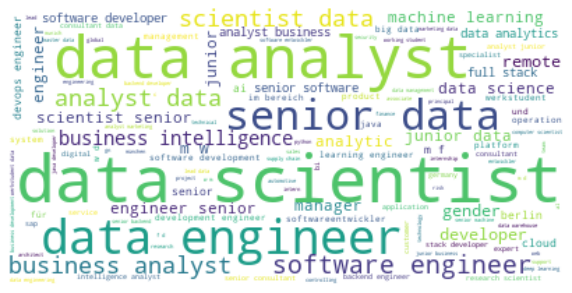

In [429]:
text = ' '.join(df_combine['position'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

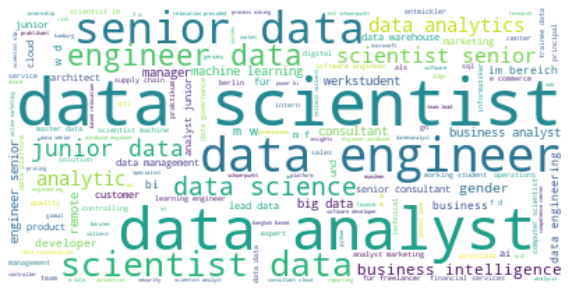

In [430]:
text = ' '.join(df_combine_data['position'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

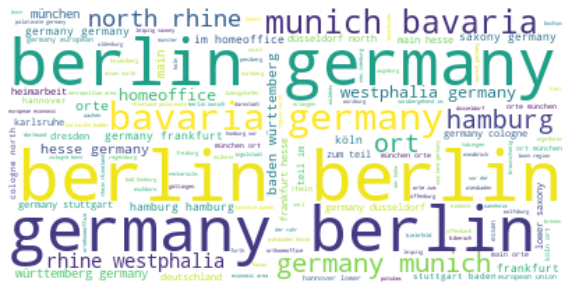

In [431]:
text = ' '.join(df_combine_data['location'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

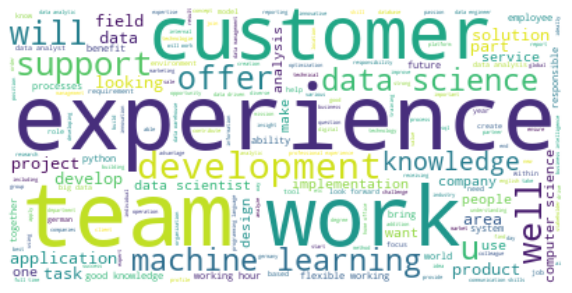

In [432]:
text = ' '.join(df_combine_data['job_description_en'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')